In [1]:
import numpy as np
import pandas as pd


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\ProgramData\manu\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
titanic_data=pd.read_csv('F://train.csv')

In [5]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_data.shape

(891, 12)

In [7]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

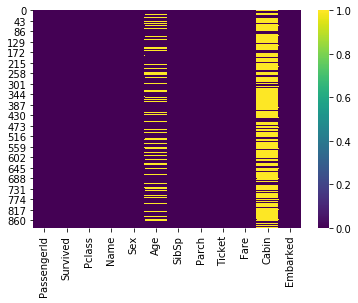

In [10]:
#heatmap is used to represent various shades of same color for the values to be plotted
sns.heatmap(titanic_data.isnull(),cmap='viridis')

In [12]:
#how many peoples are survived or dead
# 1 means survived 0 means dead
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

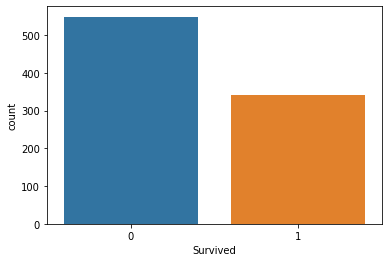

In [13]:
sns.countplot(x='Survived',data=titanic_data)

In [14]:
#How many males and females were travelling on that ship?
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [15]:
# how many females and males are survived
titanic_data.groupby('Sex')['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

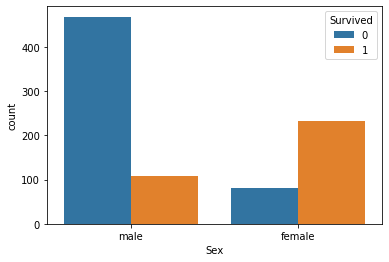

In [16]:
#Hue Paramter
#take column name for colour encoding
sns.countplot(x='Sex',hue='Survived',data=titanic_data)

In [18]:
#Survival rate of male
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [51]:
titanic_data.groupby('Sex')['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [52]:
titanic_data.groupby('Sex')['Survived'].value_counts()[3]/titanic_data['Sex'].value_counts()[0]*100

18.890814558058924

In [53]:
#Survial rate of female
titanic_data.groupby('Sex')['Survived'].value_counts()[0]/titanic_data['Sex'].value_counts()[1]*100

74.20382165605095

In [29]:
#suppose i want to find how many People were Travelling Alone?
alone=titanic_data[(titanic_data['SibSp']==0) & (titanic_data['Parch']==0)]

In [30]:
alone.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [31]:
alone.shape

(537, 12)

In [32]:
alone['Survived'].value_counts()

0    374
1    163
Name: Survived, dtype: int64

In [33]:
#What is the Survival rate of the person travelling alone?
alone['Survived'].value_counts(normalize=True)

0    0.696462
1    0.303538
Name: Survived, dtype: float64

In [34]:
#Where survival rate is more, people were travelling alone or people with travelling either parents or siblings
not_alone=titanic_data[(titanic_data['SibSp']!=0) | (titanic_data['Parch']!=0)]

In [35]:
not_alone.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [36]:
not_alone['Survived'].value_counts(normalize=True)

1    0.50565
0    0.49435
Name: Survived, dtype: float64

In [37]:
alone['Survived'].value_counts(normalize=True)

0    0.696462
1    0.303538
Name: Survived, dtype: float64

In [40]:
# Which is the survival rate is more people travelling with parents(Parch) only or people travelling with siblings only?
#sibling only
titanic_data[(titanic_data['SibSp']==0) & (titanic_data['Parch']!=0)]['Survived'].value_counts(normalize=True)

1    0.661972
0    0.338028
Name: Survived, dtype: float64

In [41]:
#survival rate of parents only
titanic_data[(titanic_data['SibSp']!=0) & (titanic_data['Parch']==0)]['Survived'].value_counts(normalize=True)

0    0.503546
1    0.496454
Name: Survived, dtype: float64

In [46]:
# how many people survived from different Pclass based on gender
titanic_data.groupby(['Pclass','Sex'])['Survived'].value_counts()

Pclass  Sex     Survived
1       female  1            91
                0             3
        male    0            77
                1            45
2       female  1            70
                0             6
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
Name: Survived, dtype: int64

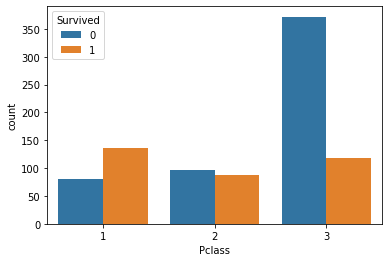

In [47]:
# In which passenger class people were more safe
sns.countplot(x='Pclass',hue='Survived',data=titanic_data)

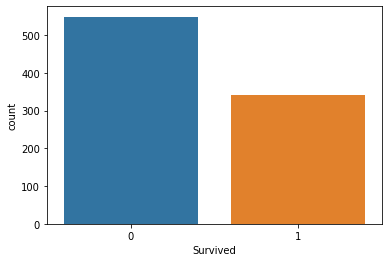

In [49]:
#how many are people are survived
sns.countplot(x='Survived',data=titanic_data)

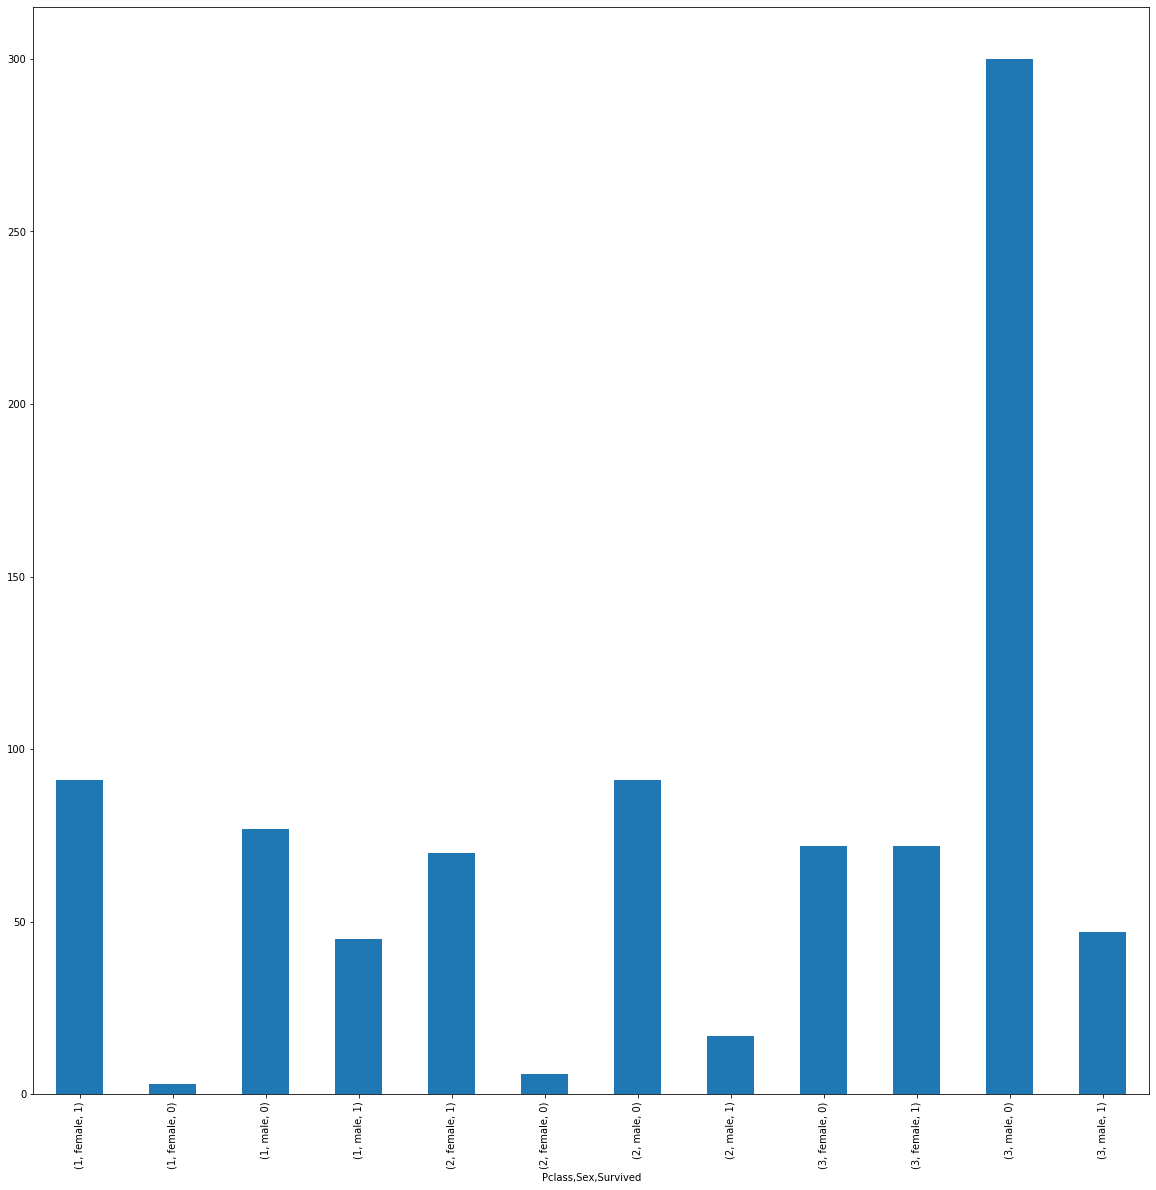

In [55]:
plt.figure(figsize=(20,20))
titanic_data.groupby(['Pclass','Sex'])['Survived'].value_counts().plot(kind='bar')

In [56]:
# check fare based on different Pclass
titanic_data.groupby('Pclass')['Fare'].value_counts()

Pclass  Fare   
1       26.5500    15
        52.0000     7
        0.0000      5
        30.0000     5
        30.5000     5
                   ..
3       15.5500     1
        17.4000     1
        21.6792     1
        22.0250     1
        22.5250     1
Name: Fare, Length: 255, dtype: int64

In [57]:
titanic_data.groupby('Pclass')['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [59]:
# which passenger class contain more fare on the basis of gender
titanic_data.groupby(['Pclass','Sex'])['Fare'].mean()

Pclass  Sex   
1       female    106.125798
        male       67.226127
2       female     21.970121
        male       19.741782
3       female     16.118810
        male       12.661633
Name: Fare, dtype: float64

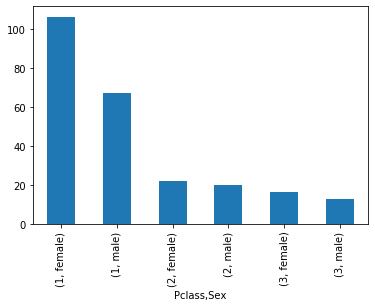

In [60]:
titanic_data.groupby(['Pclass','Sex'])['Fare'].mean().plot(kind='bar')

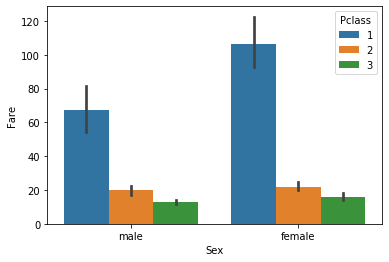

In [61]:
sns.barplot(x='Sex',y='Fare',hue='Pclass',data=titanic_data)

In [62]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [70]:
# we drop cabin column because it has lot of null values
titanic_data.drop('Cabin',axis=1,inplace=True)

In [71]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [72]:
titanic_data[titanic_data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [73]:
titanic_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [74]:
# so we replace or fill this Embarked column
titanic_data['Embarked'].fillna('S',inplace=True)

In [75]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [76]:
titanic_data[titanic_data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [77]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [78]:
titanic_data['Age'].mean()

29.69911764705882

In [79]:
titanic_data['Age'].median()

28.0

In [80]:
# Now we fill ages column 
titanic_data.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [83]:
# we check for pclass is equal to 1 and null values
titanic_data[(titanic_data['Pclass']==1) & (titanic_data['Age'].isnull())].fillna(38.23)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,38.23,1,0,PC 17569,146.5208,C
55,56,1,1,"Woolner, Mr. Hugh",male,38.23,0,0,19947,35.5000,S
64,65,0,1,"Stewart, Mr. Albert A",male,38.23,0,0,PC 17605,27.7208,C
166,167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,38.23,0,1,113505,55.0000,S
168,169,0,1,"Baumann, Mr. John D",male,38.23,0,0,PC 17318,25.9250,S
185,186,0,1,"Rood, Mr. Hugh Roscoe",male,38.23,0,0,113767,50.0000,S
256,257,1,1,"Thorne, Mrs. Gertrude Maybelle",female,38.23,0,0,PC 17585,79.2000,C
270,271,0,1,"Cairns, Mr. Alexander",male,38.23,0,0,113798,31.0000,S
284,285,0,1,"Smith, Mr. Richard William",male,38.23,0,0,113056,26.0000,S
295,296,0,1,"Lewy, Mr. Ervin G",male,38.23,0,0,PC 17612,27.7208,C


In [84]:
# we also use function fill null values
def input_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 38.23
        elif Pclass==2:
            return 29.87
        elif Pclass==3:
            return 25.140
    else:
        return Age

In [85]:
titanic_data['Age']=titanic_data[['Age','Pclass']].apply(input_age,axis=1)

In [86]:
# we see here now there is no null values
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [87]:
# suppose i want to convert sex column into 0 and 1 so we use one hot encoding or replace function
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [100]:
# this is first method
titanic_data['Sex'].replace(to_replace=['male','female'],value=[0,1],inplace=True)

In [101]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,2
1,1,1,1,38.0,1,0,71.2833,0
2,1,3,1,26.0,0,0,7.9250,2
3,1,1,1,35.0,1,0,53.1000,2
4,0,3,0,35.0,0,0,8.0500,2


In [91]:
# Label encoder
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
titanic_data['Embarked']=lb.fit_transform(titanic_data['Embarked'])

In [92]:
titanic_data.groupby('Embarked')['Survived'].value_counts()

Embarked  Survived
0         1            93
          0            75
1         0            47
          1            30
2         0           427
          1           219
Name: Survived, dtype: int64

In [94]:
# we drop unwanted columns
titanic_data.drop(['PassengerId','Ticket','Name'],axis=1,inplace=True)

In [97]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,2
1,1,1,female,38.0,1,0,71.2833,0
2,1,3,female,26.0,0,0,7.9250,2
3,1,1,female,35.0,1,0,53.1000,2
4,0,3,male,35.0,0,0,8.0500,2


In [102]:
# now we are build the model
x=titanic_data.drop('Survived',axis=1)
y=titanic_data['Survived']

In [104]:
from sklearn.model_selection import train_test_split

In [115]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)

In [116]:
from sklearn.linear_model import LogisticRegression

In [117]:
model=LogisticRegression()

In [118]:
model.fit(x_train,y_train)

C:\ProgramData\manu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [119]:
y_pred=model.predict(x_test)

In [120]:
y_test.head()

40     0
595    0
56     1
337    1
433    0
Name: Survived, dtype: int64

In [121]:
y_pred

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,

In [122]:
# we check accuracy    
# accuracy changes each time when test_size changes
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

84.87394957983193